# Notebook to plot firing rate correlation between stimulus and delay phases.

In [10]:
"""Imports."""

from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns

# Matplotlib settings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.dpi'] = 300

In [ ]:
"""Load data."""

_DATA_DIR = Path("../../../cache/figures/supp_fig_stimulus/selectivity_correlation")

dfs = []
for subject in _DATA_DIR.iterdir():
    if subject.name.startswith('.'):
        continue
    for session in subject.iterdir():
        if session.name.startswith('.'):
            continue
        df = pd.read_csv(session / "units.csv")
        df["subject"] = subject.name
        df["session"] = session.name
        dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)

df_long = {
    "subject": [],
    "session": [],
    "unit": [],
    "Brain Area": [],
    "axis": [],
    "delay_fr": [],
    "stimulus_fr": [],
}
for axis in ["0", "1", "2"]:
    df_long["subject"].extend(df_all["subject"].tolist())
    df_long["session"].extend(df_all["session"].tolist())
    df_long["unit"].extend(df_all["unit"].tolist())
    df_long["Brain Area"].extend(df_all["brain_area"].tolist())
    df_long["axis"].extend([axis] * len(df_all))
    for phase in ["stimulus", "delay"]:
        fr_col = f"{phase}_{axis}"
        df_long[f"{phase}_fr"].extend(df_all[fr_col].tolist())
df_long = pd.DataFrame(df_long)

/opt/miniconda3/envs/wm_paper/lib/python3.12/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/opt/miniconda3/envs/wm_paper/lib/python3.12/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/opt/miniconda3/envs/wm_paper/lib/python3.12/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


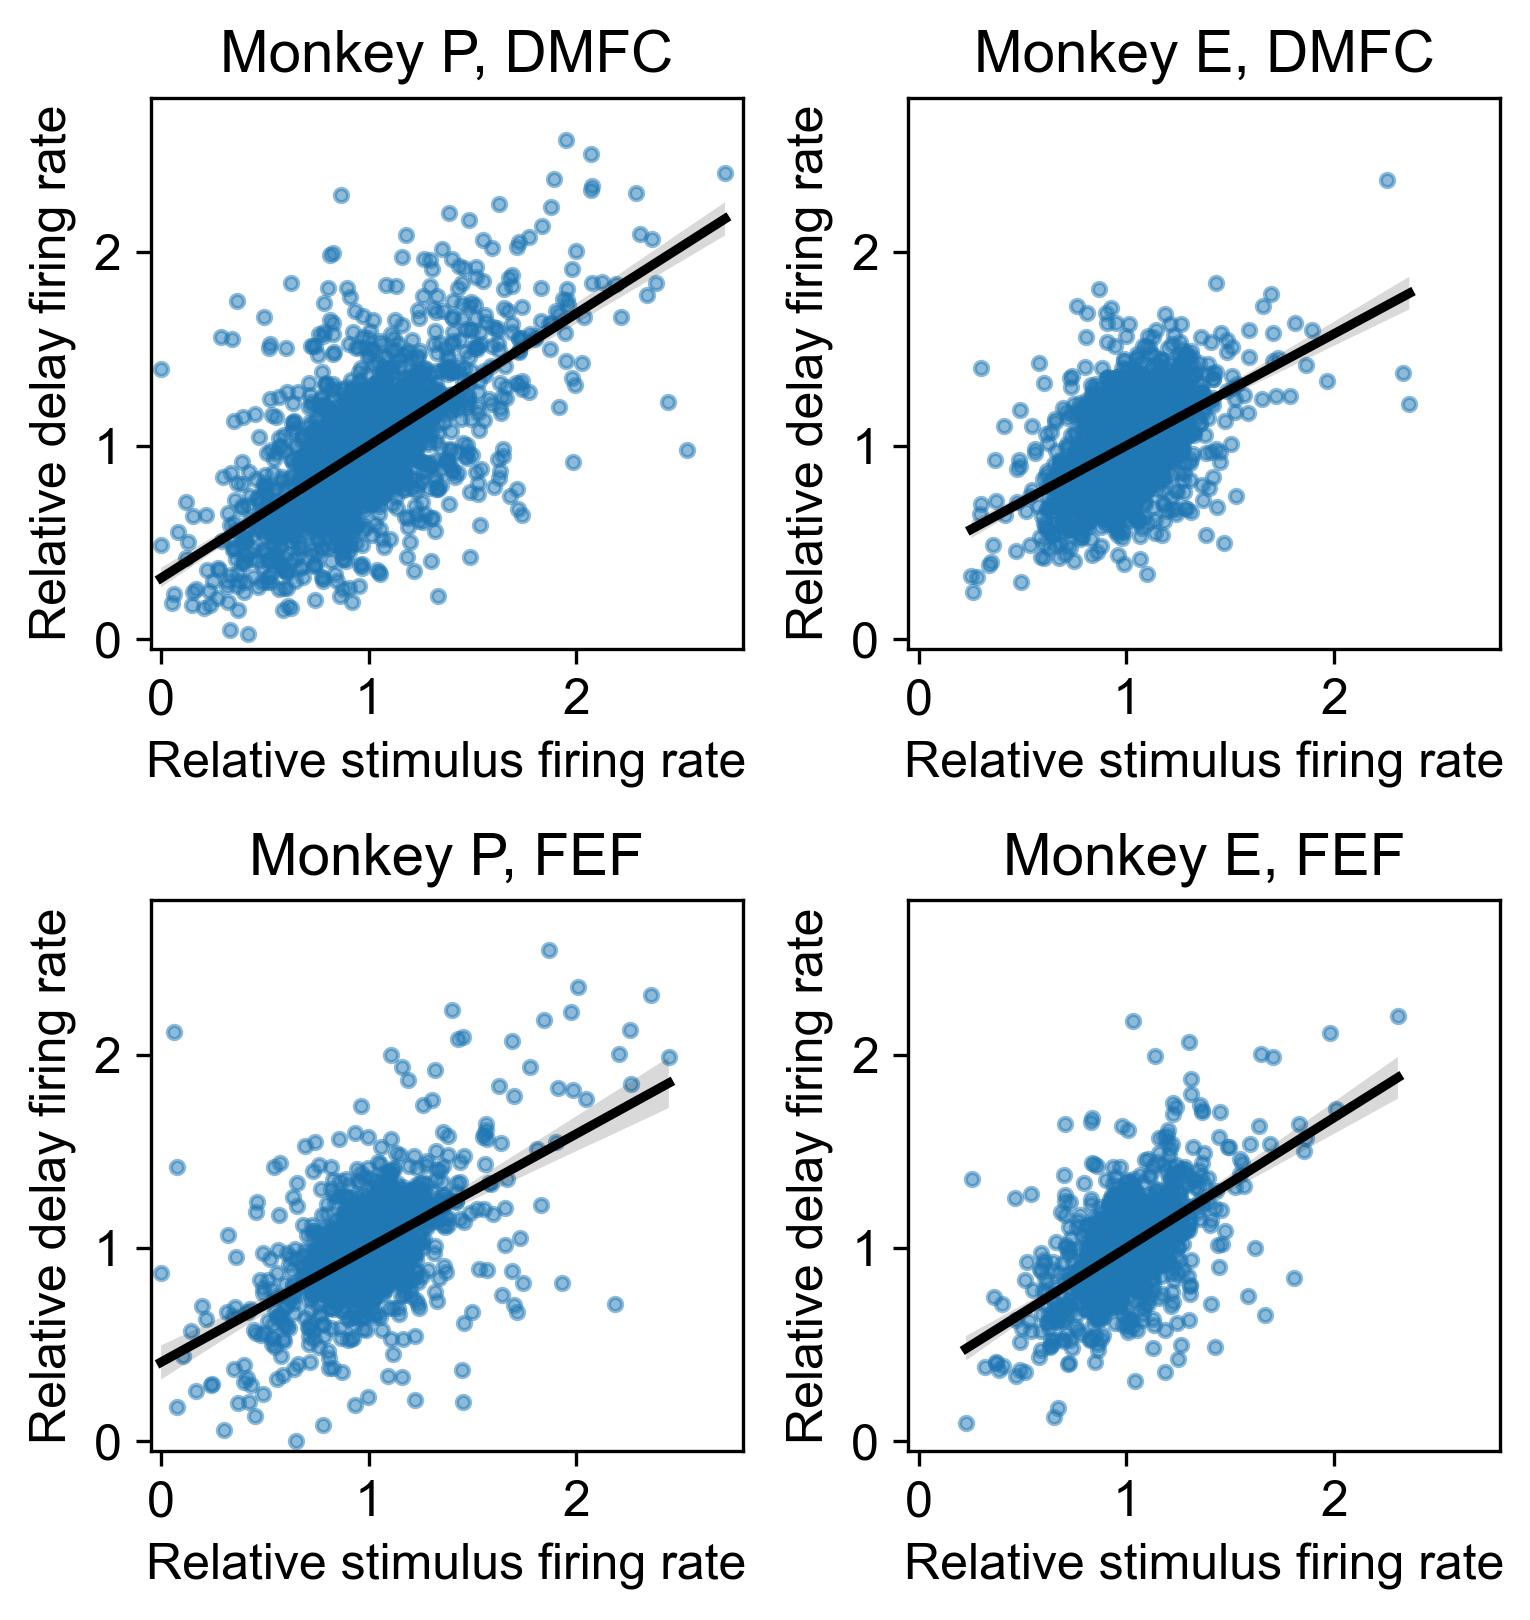

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(5.2, 5.5))
for ax_row, brain_area in zip(axes, ["DMFC", "FEF"]):
    for ax, subject in zip(ax_row, ["Perle", "Elgar"]):
        subject_area_df = df_long[
            (df_long["subject"] == subject)
            & (df_long["Brain Area"] == brain_area)
        ]
        sns.regplot(
            data=subject_area_df,
            x="stimulus_fr",
            y="delay_fr",
            ax=ax,
            scatter_kws=dict(alpha=0.5, s=10, edgecolor=None),
            line_kws=dict(color="k"),
        )
        ax.set_xlabel("Relative stimulus firing rate")
        ax.set_ylabel("Relative delay firing rate")
        ax.set_title(f"Monkey {subject[0]}, {brain_area}")
        ax.set_xlim([-0.05, 2.8])
        ax.set_ylim([-0.05, 2.8])

# Save figure
fig.tight_layout()
fig.savefig("./selectivity_correlation.pdf", bbox_inches="tight", pad_inches=0.01)